In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
ab=pd.read_csv('abalone.csv')
ab

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ab['Sex']=le.fit_transform(ab['Sex'])

In [4]:
ab

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
ab.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [7]:
ab.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

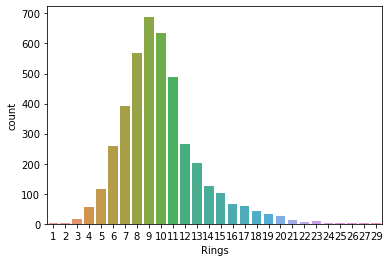

In [9]:
sns.countplot(ab['Rings'])

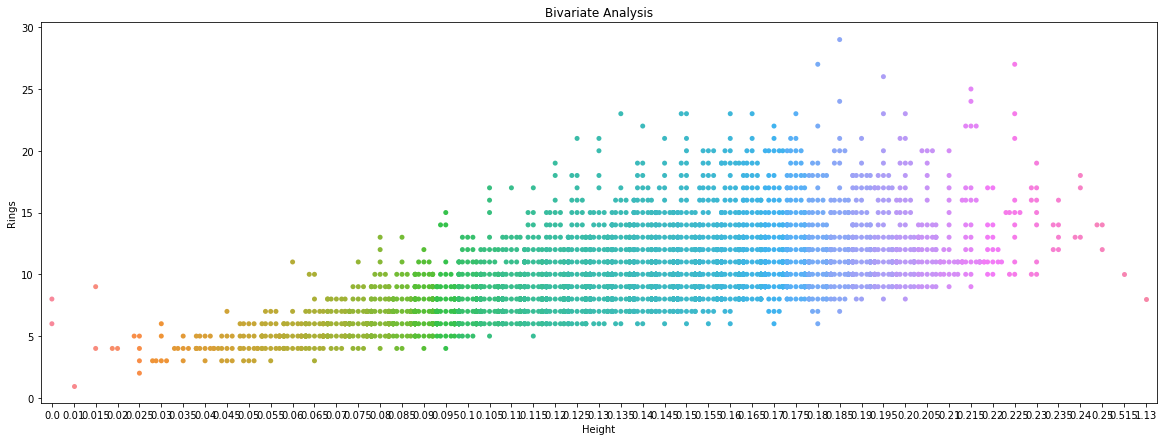

In [10]:
plt.figure(figsize=(20,7))
sns.swarmplot(x='Height',y='Rings',data=ab)
plt.title('Bivariate Analysis')
plt.show()

In [11]:
ab.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
sns.heatmap?

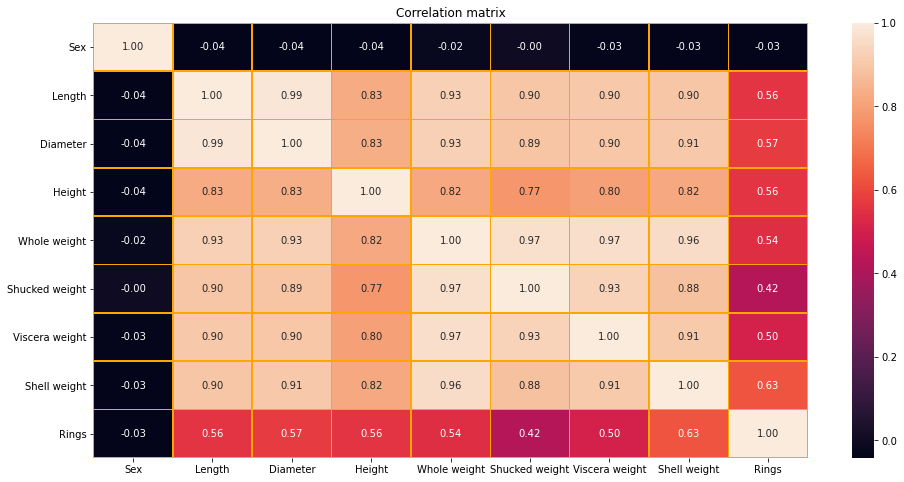

In [13]:
corr=ab.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

In [14]:
ab.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


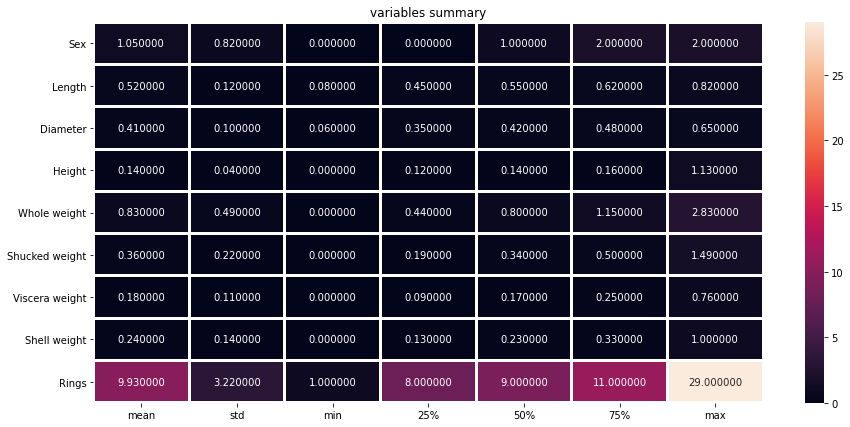

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(round(ab.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.title('variables summary')
plt.show()

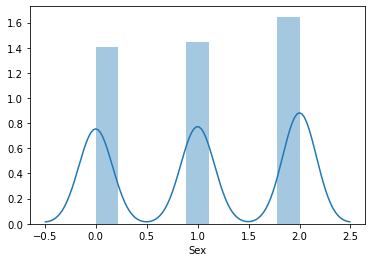

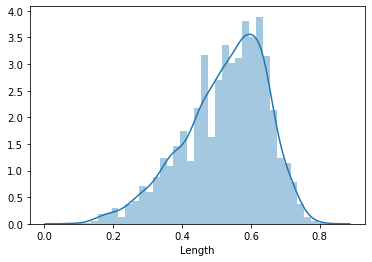

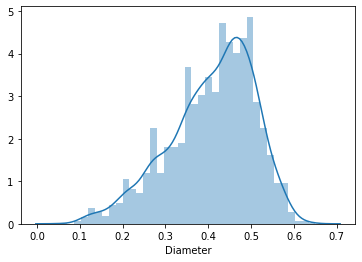

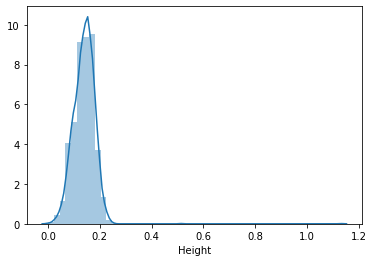

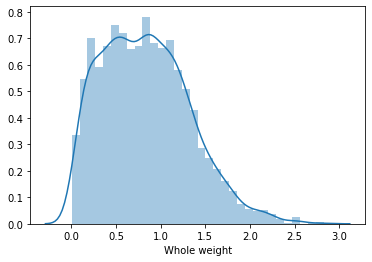

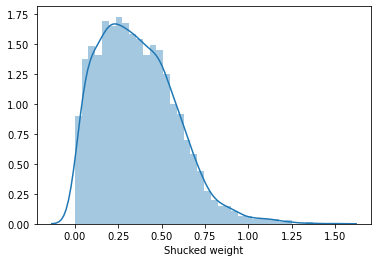

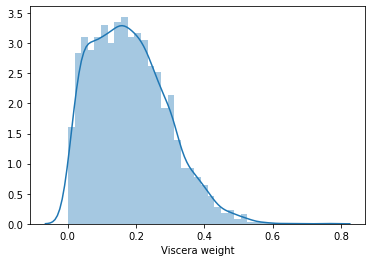

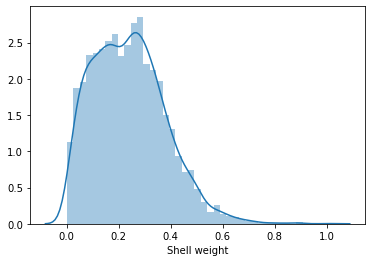

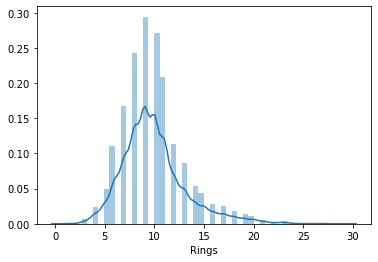

In [16]:
for m in ab.columns:
    plt.figure()
    sns.distplot(ab[m])

In [17]:
ab.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [18]:
cor=ab.corr()
cor['Rings'].sort_values(ascending=True)

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

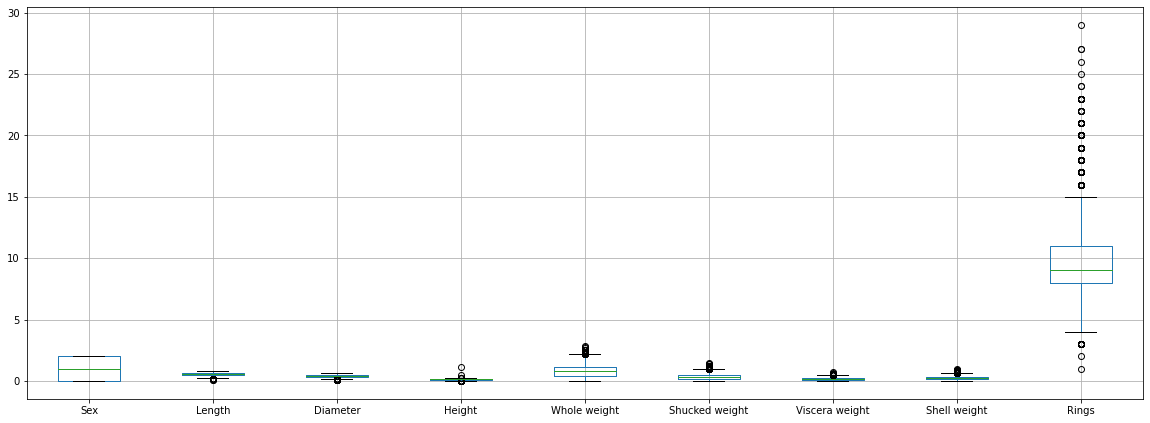

In [19]:
ab.iloc[:,0:].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.20)
plt.show()

In [20]:
ab.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [21]:
ab.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

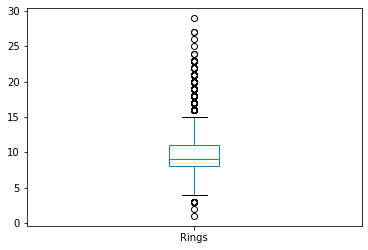

In [22]:
ab['Rings'].plot.box()

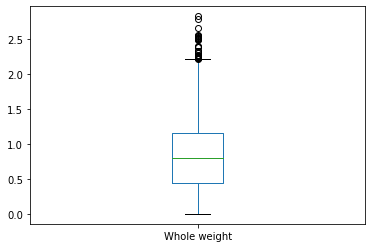

In [23]:
ab['Whole weight'].plot.box()

In [24]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ab))
z.shape

(4177, 9)

In [25]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [26]:
ab_new=ab[(z<3).all(axis=1)]
print(ab.shape)
print(ab_new.shape)

(4177, 9)
(4027, 9)


In [27]:
loss_percent=(4177-4027)/4177*100
print(loss_percent)

3.5910940866650707


In [28]:
x=ab_new.iloc[:,:-1]
y=ab_new.iloc[:,-1]

In [29]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.13432919, -0.68445079, -0.54337947, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [ 1.13432919, -1.4117394 , -1.40113174, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-1.31306782, -0.0462191 ,  0.03716259, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 1.13432919,  0.65112915,  0.70592133, ...,  0.90189694,
         1.08965131,  0.66363183],
       [-1.31306782,  0.92606411,  0.8377131 , ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.13432919,  1.9719402 ,  1.85550496, ...,  2.31446634,
         1.73214622,  1.85675543]])

In [31]:
from sklearn.svm import SVC 
maxAcc=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=i)
    sv=SVC()
    sv.fit(x_train,y_train)
    predsv=sv.predict(x_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.275177304964539 on Random_state  1
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.27588652482269505 on Random_state  7
Best Accuracy is  0.2957446808510638 on Random_state  17
Best Accuracy is  0.2957446808510638 on Ran

Best Accuracy is  0.300709219858156 on Random_state  50
Best Accuracy is  0.300709219858156 on Random_state  50
Best Accuracy is  0.300709219858156 on Random_state  50


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=50)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.19074492099322798
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  6  8  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12 13 16  9  1  2  0  0  0  0  0  0  1  0  0]
 [ 1  0  6 23 16 20 13  5  2  2  0  0  1  0  0  0  0]
 [ 0  0  2  9 25 30 29 11  9  3  2  6  1  0  0  1  0]
 [ 0  0  1  1  8 23 35 28 24 10  3  4  1  0  1  2  0]
 [ 0  0  0  3 12 21 30 31 21 10  3  2  3  3  2  1  2]
 [ 0  0  0  3  3 12 20 25 20  5  8  6  4  4  0  1  2]
 [ 0  0  0  0  0  3  9 13  7  2  4  2  3  1  2  0  2]
 [ 0  0  0  0  1  0  7 10  4  5  6  1  1  5  0  0  0]
 [ 0  0  0  0  0  0  2  5  2  6  2  2  2  3  0  1  1]
 [ 0  0  0  0  0  0  0  6  5  2  4  2  4  4  1  0  0]
 [ 0  0  0  0  0  0  1  2  0  0  3  3  1  0  1  1  0]
 [ 0  0  0  0  0  1  1  2  1  1  2  0  2  1  1  0  1]
 [ 0  0  0  0  0  0  1  1  2  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  0  1  1  0  2  1  2  0]]
              precision    recall  f1-score   support

      

In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.3013544018058691
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 14  6  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2 15 31  4  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 10 40 20 11  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 17 57 41 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 29 72 31  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  3 19 62 42 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  7 28 48 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 20 18  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 14 17  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 12  3  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7 15  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  6  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  4  1  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

       

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.23702031602708803
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  8  7  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  5 18 26  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  6 17 24 26  9  4  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  8 25 49 31  8  2  2  1  0  1  0  0  0  0]
 [ 0  1  0  2 11 35 52 27  9  2  2  0  0  0  0  0  0]
 [ 0  0  0  5  5 28 41 25 26  9  2  1  1  0  1  0  0]
 [ 0  0  0  2  3 13 34 27 23  8  3  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 17  6 12  4  0  0  1  2  0  0  0]
 [ 0  0  0  1  1  5 12  7  8  3  2  0  1  0  0  0  0]
 [ 0  0  0  0  2  3  1 10  4  1  2  0  1  2  0  0  0]
 [ 0  0  0  0  1  3  6  5  3  1  4  2  1  1  1  0  0]
 [ 0  0  0  0  0  0  5  3  1  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  2  2  1  1  3  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  1  1  1  2  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  2  2  2  0  1  1  0  0  0  1  0]]
              precision    recall  f1-score   support

      

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.2742663656884876
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  9  7  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 14 31  4  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  3 17 27 23 10  5  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  3 25 44 42 10  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  9 27 62 28  9  3  2  0  0  0  0  0  0]
 [ 0  0  0  2  4 20 46 37 25  7  1  0  0  0  2  0  0]
 [ 0  0  0  1  3  5 28 26 35  8  4  1  2  0  0  0  0]
 [ 0  0  0  0  0  4 13 16  8  2  2  1  1  1  0  0  0]
 [ 0  0  0  0  0  1  8  9 12  2  6  0  2  0  0  0  0]
 [ 0  0  0  0  1  3  3  6  2  2  3  2  3  1  0  0  0]
 [ 0  0  0  0  0  2  1  8  3  4  6  2  0  1  1  0  0]
 [ 0  0  0  0  0  0  1  3  2  0  3  0  1  0  1  1  0]
 [ 0  0  0  0  0  1  2  3  2  0  3  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  1  2  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  1  1  3  0  2  0  0  1  0]]
              precision    recall  f1-score   support

       

In [37]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dtc,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.2009053218870891


In [38]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.26993172325570647


In [39]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.2192722284727895


In [40]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rf,x,y,cv=5)
print("cross validation score model",scr.mean())

cross validation score model 0.25329377494875394


minimum difference is accuracy and cross validation score is for DecisionTreeClassifier() so this is our best model.

In [41]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':np.arange(2,15),
       'criterion':['gini','entropy']}
gcv= GridSearchCV(DecisionTreeClassifier(),params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [42]:
print(gcv.best_params_)
print(gcv.best_score_)

{'criterion': 'gini', 'max_depth': 6}
0.27316689113242126


In [43]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.1930022573363431
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  7  7  2  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13 14 10 10  4  1  1  0  0  0  0  1  0  0  0]
 [ 1  0  6 19 15 21 15  7  2  2  0  1  0  0  0  0  0]
 [ 0  0  2  7 25 33 31 14  7  3  1  4  1  0  0  0  0]
 [ 0  0  2  1  7 26 32 27 23  9  8  4  2  0  0  0  0]
 [ 0  0  0  2 10 21 33 29 23 11  2  2  5  2  1  1  2]
 [ 0  0  0  4  3 13 16 22 23  7  8  8  2  4  1  0  2]
 [ 0  0  0  0  0  1  7 13  8  3  4  2  4  1  2  1  2]
 [ 0  0  0  0  1  0  6  8  2  6  6  4  1  4  0  1  1]
 [ 0  0  0  0  0  1  1  3  3  7  2  2  2  4  0  1  0]
 [ 0  0  0  0  0  0  0  6  5  3  4  2  3  4  1  0  0]
 [ 0  0  0  0  0  1  0  2  1  0  4  2  0  0  0  2  0]
 [ 0  0  0  0  0  1  1  2  0  2  2  0  2  1  1  0  1]
 [ 0  0  0  0  0  0  1  0  3  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  1  1  0  2  1  3  0]]
              precision    recall  f1-score   support

       

In [45]:
import joblib
joblib.dump(dt,'abalonefile.obj')

['abalonefile.obj']